<a href="https://colab.research.google.com/github/SpineSoloh/Luyten-a/blob/main/Pell_Grant_prediction_by_Spines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

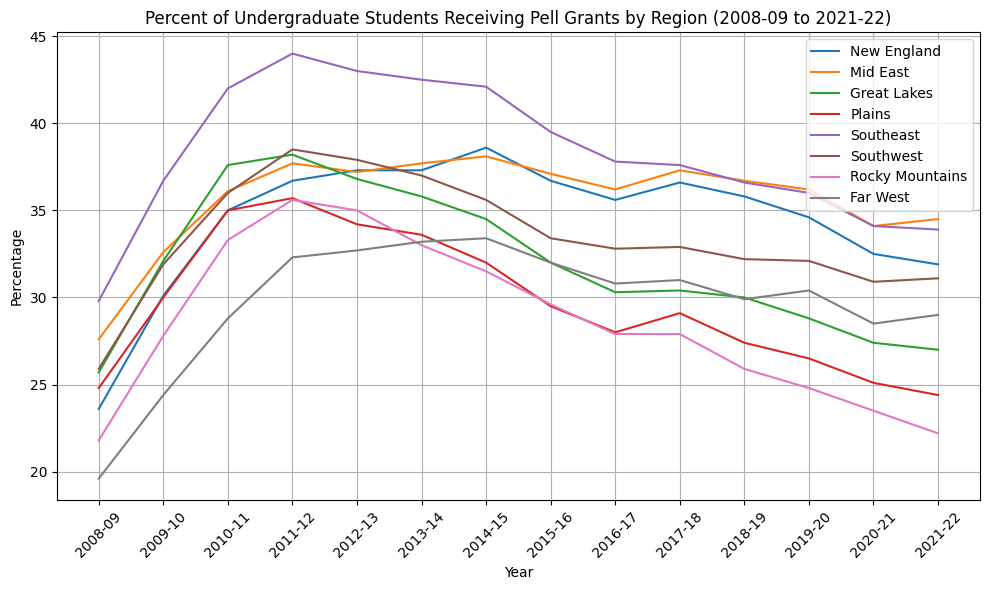

In [3]:
import matplotlib.pyplot as plt

# Data
years = [
    "2008-09", "2009-10", "2010-11", "2011-12", "2012-13", "2013-14", "2014-15",
    "2015-16", "2016-17", "2017-18", "2018-19", "2019-20", "2020-21", "2021-22"
]

regions = [
    "New England", "Mid East", "Great Lakes", "Plains",
    "Southeast", "Southwest", "Rocky Mountains", "Far West"
]

data = [
    [23.60, 30.10, 35.00, 36.70, 37.30, 37.30, 38.60, 36.70, 35.60, 36.60, 35.80, 34.60, 32.50, 31.90],
    [27.60, 32.60, 36.10, 37.70, 37.20, 37.70, 38.10, 37.10, 36.20, 37.30, 36.70, 36.20, 34.10, 34.50],
    [25.70, 32.10, 37.60, 38.20, 36.80, 35.80, 34.50, 32.00, 30.30, 30.40, 30.00, 28.80, 27.40, 27.00],
    [24.80, 30.00, 35.00, 35.70, 34.20, 33.60, 32.00, 29.50, 28.00, 29.10, 27.40, 26.50, 25.10, 24.40],
    [29.80, 36.70, 42.00, 44.00, 43.00, 42.50, 42.10, 39.50, 37.80, 37.60, 36.60, 36.00, 34.10, 33.90],
    [25.90, 31.90, 36.00, 38.50, 37.90, 37.00, 35.60, 33.40, 32.80, 32.90, 32.20, 32.10, 30.90, 31.10],
    [21.80, 27.80, 33.30, 35.60, 35.00, 33.00, 31.50, 29.60, 27.90, 27.90, 25.90, 24.80, 23.50, 22.20],
    [19.60, 24.40, 28.80, 32.30, 32.70, 33.20, 33.40, 32.00, 30.80, 31.00, 29.90, 30.40, 28.50, 29.00]
]

# Plotting
plt.figure(figsize=(10, 6))

for i in range(len(regions)):
    plt.plot(years, data[i], label=regions[i])

plt.title('Percent of Undergraduate Students Receiving Pell Grants by Region (2008-09 to 2021-22)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


### Forecast next two academic years

In [4]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
def forecast_next_two_years(region_data):
    # Convert data to pandas DataFrame
    df = pd.DataFrame({
        'Year': years,
        'Percentage': region_data
    })

    # Set 'Year' column as index/Convert index to datetime
    df.set_index('Year', inplace=True)
    df.index = pd.to_datetime(df.index, format='%Y-%y')

    # Fit ARIMA model
    model = ARIMA(df, order=(1, 1, 1))
    results = model.fit()
    forecast = results.forecast(steps=2)

    return forecast

# Predictions for each region
predictions = {}
for i, region in enumerate(regions):
    forecast = forecast_next_two_years(data[i])
    predictions[region] = forecast

# Display predictions
for region, forecast in predictions.items():
    print(f"Region: {region}")
    print(f"2022-23: {forecast[0]:.2f}%")
    print(f"2023-24: {forecast[1]:.2f}%")
    print()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

Region: New England
2022-23: 31.61%
2023-24: 31.39%

Region: Mid East
2022-23: 34.89%
2023-24: 35.17%

Region: Great Lakes
2022-23: 27.49%
2023-24: 27.79%

Region: Plains
2022-23: 24.17%
2023-24: 24.06%

Region: Southeast
2022-23: 34.85%
2023-24: 35.52%

Region: Southwest
2022-23: 31.62%
2023-24: 32.07%

Region: Rocky Mountains
2022-23: 21.16%
2023-24: 20.32%

Region: Far West
2022-23: 29.12%
2023-24: 29.23%



PLOTTING FOR THE PELL RATE AFTER PREDICTION

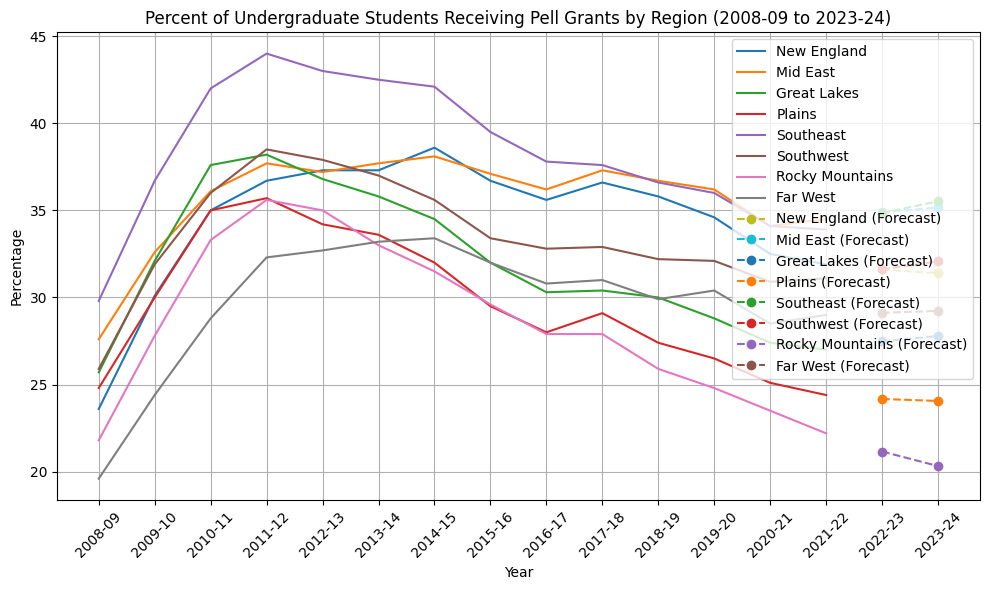

In [5]:

# Plotting
plt.figure(figsize=(10, 6))

# Plot original data
for i in range(len(regions)):
    plt.plot(years, data[i], label=regions[i])

# Plot predicted values
for region, forecast in predictions.items():
    plt.plot(['2022-23', '2023-24'], forecast, 'o--', label=f'{region} (Forecast)')

plt.title('Percent of Undergraduate Students Receiving Pell Grants by Region (2008-09 to 2023-24)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

SHOWING THE SLOPE OF TREND LINES FOR EACH REGION TO FIND REGIONS WITH HIGHER TRENDS

In [6]:

# Calculate slopes of the trend lines for each region
slopes = []
for region_data in data:
    x = np.arange(len(region_data))
    slope, _ = np.polyfit(x, region_data, 1)
    slopes.append(slope)

# Identify regions with higher slopes
higher_trend_regions = [region for region, slope in zip(regions, slopes) if slope > 0]

print("Regions with a higher trend in Pell grants:")
for region in higher_trend_regions:
    print(region)


Regions with a higher trend in Pell grants:
New England
Mid East
Far West


Inspecting Data for any sequential trend

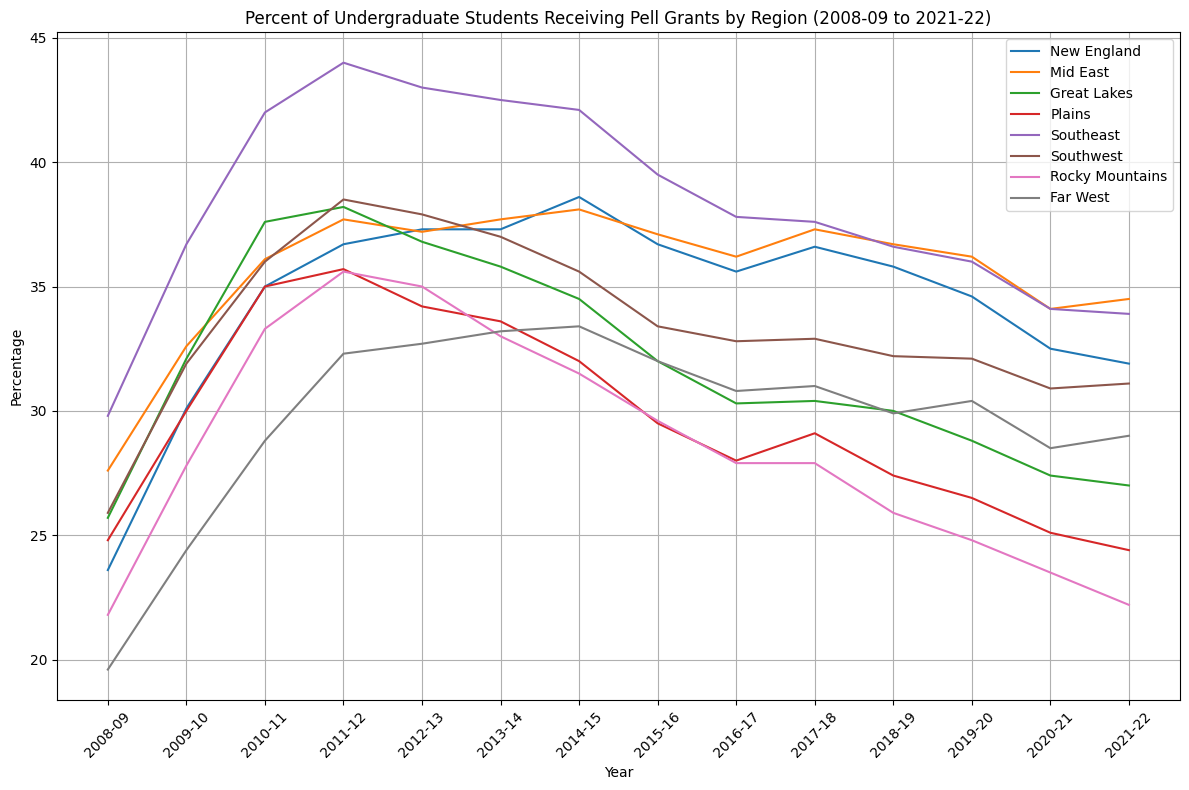

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

for i in range(len(regions)):
    plt.plot(years, data[i], label=regions[i])

plt.title('Percent of Undergraduate Students Receiving Pell Grants by Region (2008-09 to 2021-22)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()